**The Notebook contains the code for Building Neural Network for CIFAR-10 class data which is a classification based.**

#### Target of Book: 

The architecture has to be made up using different convolutional methods such as DILATION, DEPTHWISE, without using MAXPOOLING which must have receptive field greater than 44 and have parameters less than 200K achieving validation accuracy of 85%.

#### Description:


   * The network architecture is built up on involving different convolutions, features.

   * This network has been reduced to usage of lesser number of parameters **(170106) ~ 17 thousand parameter**, which makes it a lighter model.

   * The Architecture only has Convolutions, Relu activation function, and returning result with softmax, which returns a list of probabilites of classes and will contain  (BatchNormalization, Dropouts, Augmentations, GAP Layer at final layer).

   * The Receptive Field looks out a 47x47 at the end.

   * EPOCHS: Iterated the dataset for 84 times.

   * BATCHSIZE : 128

Accuracies are mentioned in the "Results" section and "analysis" is made.

As per my view & visualizations, the model's accuracy has been great compared to previous architecture it starts with underfitted accuracies and regain the good accuracy score.

In [1]:
%matplotlib inline

In [2]:
import sys
PATH = "/kaggle/input/newerfile"
sys.path.insert(1, PATH)

#### A. Importing Libraries

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
# from model import Net 
import albumentations as A
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm 
import torch.backends.cudnn as cudnn 
from torch.utils.data import Dataset,DataLoader



from utils import Draw,loader,class_accuracy
from model import Net
from main import Performance

#### B. DataLoading & Data-splitting & Data Augmenting

In [4]:
trainloader,testloader = loader.load_data()

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


#### C. Visualizations

> Lets view testing set images

Plotting Test Images!
  cat  ship  ship plane  frog  frog   car  frog   cat   car plane truck
3 images are plotted


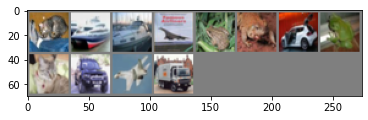

In [5]:
# get some random testing images
from colorama import Fore,Style

print(Style.BRIGHT+Fore.GREEN+'Plotting Test Images!')
dataiter = next(iter(testloader))
classes = ('plane', 'car', 'bird', 'cat',
            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
labels = dataiter[1]
image_set , labels = dataiter
idx = 12
print(' '.join('%5s' % classes[labels[j]] for j in range(idx)))
Draw.plotings(torchvision.utils.make_grid(image_set[:idx]))

> Lets view training set images

Plotting Train Images!
horse horse plane horse   car   cat plane   cat  ship  ship   car  deer
3 images are plotted


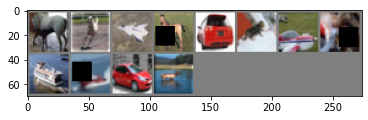

In [6]:

print(Style.BRIGHT+Fore.RED+'Plotting Train Images!')
# get some random training images
dataiter = next(iter(trainloader))
classes = ('plane', 'car', 'bird', 'cat',
            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
labels = dataiter[1]
image_set , labels = dataiter
idx = 12
print(' '.join('%5s' % classes[labels[j]] for j in range(idx)))
# plt.imshow(image_set[4])
Draw.plotings(torchvision.utils.make_grid(image_set[:idx]))

#### D. Model Summary

In [7]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(3, 32, 32))
print(device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             448
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
            Conv2d-4           [-1, 32, 32, 32]           4,640
       BatchNorm2d-5           [-1, 32, 32, 32]              64
              ReLU-6           [-1, 32, 32, 32]               0
            Conv2d-7           [-1, 32, 16, 16]           9,248
       BatchNorm2d-8           [-1, 32, 16, 16]              64
              ReLU-9           [-1, 32, 16, 16]               0
           Conv2d-10          [-1, 128, 14, 14]          36,992
      BatchNorm2d-11          [-1, 128, 14, 14]             256
             ReLU-12          [-1, 128, 14, 14]               0
           Conv2d-13           [-1, 64, 14, 14]          73,792
      BatchNorm2d-14           [-1, 64,

#### E. Model Schooling. 

> Here where the model learns and evaluates it self

> **Model Design**:
  
          Input Image = (32,32,3) ~ RGB channeled 32x32 Matrix

          4 Convolutional Blocks: 

          Block1: 3 Conv layers     
          +
          Block2: Dilated Conv + 2 Conv layers
          +
          Block3: Depthwise seperable Conv layers(2)
          +
          Block4 : 3 Conv layers
          +
          Gap Layer 

          Total of 3 + 3 + 2 + 3 + 1 = 12 Convolutional layers.
         
          

In [8]:
model =  Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 84
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    Performance().train(model, device, trainloader, optimizer, epoch)
    Performance().test(model, device, testloader)

EPOCH: 0


Loss=1.4938780069351196 Batch_id=390 train-Accuracy=35.98: 100%|██████████| 391/391 [00:15<00:00, 25.41it/s]



Test set: Average loss: 0.0129, val-Accuracy: 4557/10000 (45.57%)

EPOCH: 1


Loss=1.5473058223724365 Batch_id=390 train-Accuracy=47.05: 100%|██████████| 391/391 [00:14<00:00, 27.68it/s]



Test set: Average loss: 0.0099, val-Accuracy: 5527/10000 (55.27%)

EPOCH: 2


Loss=1.4121276140213013 Batch_id=390 train-Accuracy=52.29: 100%|██████████| 391/391 [00:14<00:00, 27.71it/s]



Test set: Average loss: 0.0084, val-Accuracy: 6202/10000 (62.02%)

EPOCH: 3


Loss=0.9941323399543762 Batch_id=390 train-Accuracy=55.80: 100%|██████████| 391/391 [00:14<00:00, 26.59it/s]



Test set: Average loss: 0.0080, val-Accuracy: 6436/10000 (64.36%)

EPOCH: 4


Loss=1.1532061100006104 Batch_id=390 train-Accuracy=59.03: 100%|██████████| 391/391 [00:14<00:00, 27.29it/s]



Test set: Average loss: 0.0070, val-Accuracy: 6896/10000 (68.96%)

EPOCH: 5


Loss=0.9565351605415344 Batch_id=390 train-Accuracy=60.98: 100%|██████████| 391/391 [00:14<00:00, 26.56it/s]



Test set: Average loss: 0.0067, val-Accuracy: 7038/10000 (70.38%)

EPOCH: 6


Loss=1.0180089473724365 Batch_id=390 train-Accuracy=63.34: 100%|██████████| 391/391 [00:14<00:00, 27.56it/s]



Test set: Average loss: 0.0061, val-Accuracy: 7287/10000 (72.87%)

EPOCH: 7


Loss=0.9150674939155579 Batch_id=390 train-Accuracy=64.85: 100%|██████████| 391/391 [00:14<00:00, 26.72it/s]



Test set: Average loss: 0.0063, val-Accuracy: 7245/10000 (72.45%)

EPOCH: 8


Loss=0.8118378520011902 Batch_id=390 train-Accuracy=65.53: 100%|██████████| 391/391 [00:14<00:00, 27.60it/s]



Test set: Average loss: 0.0061, val-Accuracy: 7253/10000 (72.53%)

EPOCH: 9


Loss=0.9770714044570923 Batch_id=390 train-Accuracy=67.00: 100%|██████████| 391/391 [00:14<00:00, 26.74it/s]



Test set: Average loss: 0.0058, val-Accuracy: 7410/10000 (74.10%)

EPOCH: 10


Loss=1.1249101161956787 Batch_id=390 train-Accuracy=67.64: 100%|██████████| 391/391 [00:14<00:00, 27.05it/s]



Test set: Average loss: 0.0055, val-Accuracy: 7574/10000 (75.74%)

EPOCH: 11


Loss=0.8958699107170105 Batch_id=390 train-Accuracy=68.62: 100%|██████████| 391/391 [00:14<00:00, 27.11it/s]



Test set: Average loss: 0.0053, val-Accuracy: 7693/10000 (76.93%)

EPOCH: 12


Loss=1.0302040576934814 Batch_id=390 train-Accuracy=69.43: 100%|██████████| 391/391 [00:14<00:00, 26.75it/s]



Test set: Average loss: 0.0050, val-Accuracy: 7806/10000 (78.06%)

EPOCH: 13


Loss=0.8216499090194702 Batch_id=390 train-Accuracy=69.75: 100%|██████████| 391/391 [00:14<00:00, 27.59it/s]



Test set: Average loss: 0.0051, val-Accuracy: 7803/10000 (78.03%)

EPOCH: 14


Loss=0.7384167313575745 Batch_id=390 train-Accuracy=70.62: 100%|██████████| 391/391 [00:14<00:00, 26.62it/s]



Test set: Average loss: 0.0053, val-Accuracy: 7745/10000 (77.45%)

EPOCH: 15


Loss=0.7575417160987854 Batch_id=390 train-Accuracy=71.16: 100%|██████████| 391/391 [00:14<00:00, 27.10it/s]



Test set: Average loss: 0.0048, val-Accuracy: 7928/10000 (79.28%)

EPOCH: 16


Loss=1.0111815929412842 Batch_id=390 train-Accuracy=71.77: 100%|██████████| 391/391 [00:14<00:00, 26.59it/s]



Test set: Average loss: 0.0048, val-Accuracy: 7931/10000 (79.31%)

EPOCH: 17


Loss=0.8889951705932617 Batch_id=390 train-Accuracy=72.11: 100%|██████████| 391/391 [00:14<00:00, 27.03it/s]



Test set: Average loss: 0.0049, val-Accuracy: 7850/10000 (78.50%)

EPOCH: 18


Loss=0.8260427713394165 Batch_id=390 train-Accuracy=72.21: 100%|██████████| 391/391 [00:14<00:00, 26.75it/s]



Test set: Average loss: 0.0046, val-Accuracy: 7991/10000 (79.91%)

EPOCH: 19


Loss=0.8004027605056763 Batch_id=390 train-Accuracy=72.77: 100%|██████████| 391/391 [00:14<00:00, 27.56it/s]



Test set: Average loss: 0.0047, val-Accuracy: 7969/10000 (79.69%)

EPOCH: 20


Loss=0.7270722985267639 Batch_id=390 train-Accuracy=73.18: 100%|██████████| 391/391 [00:14<00:00, 27.22it/s]



Test set: Average loss: 0.0044, val-Accuracy: 8102/10000 (81.02%)

EPOCH: 21


Loss=0.7407703399658203 Batch_id=390 train-Accuracy=73.44: 100%|██████████| 391/391 [00:14<00:00, 26.87it/s]



Test set: Average loss: 0.0044, val-Accuracy: 8091/10000 (80.91%)

EPOCH: 22


Loss=0.9800748825073242 Batch_id=390 train-Accuracy=74.02: 100%|██████████| 391/391 [00:14<00:00, 27.35it/s]



Test set: Average loss: 0.0050, val-Accuracy: 7868/10000 (78.68%)

EPOCH: 23


Loss=0.8409126400947571 Batch_id=390 train-Accuracy=73.82: 100%|██████████| 391/391 [00:14<00:00, 26.91it/s]



Test set: Average loss: 0.0046, val-Accuracy: 8023/10000 (80.23%)

EPOCH: 24


Loss=0.5648274421691895 Batch_id=390 train-Accuracy=74.49: 100%|██████████| 391/391 [00:14<00:00, 27.60it/s]



Test set: Average loss: 0.0046, val-Accuracy: 7963/10000 (79.63%)

EPOCH: 25


Loss=0.5240499377250671 Batch_id=390 train-Accuracy=74.47: 100%|██████████| 391/391 [00:14<00:00, 26.67it/s]



Test set: Average loss: 0.0041, val-Accuracy: 8236/10000 (82.36%)

EPOCH: 26


Loss=0.8150829076766968 Batch_id=390 train-Accuracy=74.66: 100%|██████████| 391/391 [00:14<00:00, 27.52it/s] 



Test set: Average loss: 0.0044, val-Accuracy: 8088/10000 (80.88%)

EPOCH: 27


Loss=0.7388021349906921 Batch_id=390 train-Accuracy=75.44: 100%|██████████| 391/391 [00:14<00:00, 26.14it/s] 



Test set: Average loss: 0.0042, val-Accuracy: 8239/10000 (82.39%)

EPOCH: 28


Loss=0.6466356515884399 Batch_id=390 train-Accuracy=75.24: 100%|██████████| 391/391 [00:14<00:00, 27.26it/s] 



Test set: Average loss: 0.0041, val-Accuracy: 8265/10000 (82.65%)

EPOCH: 29


Loss=0.6135915517807007 Batch_id=390 train-Accuracy=75.44: 100%|██████████| 391/391 [00:14<00:00, 27.16it/s] 



Test set: Average loss: 0.0040, val-Accuracy: 8259/10000 (82.59%)

EPOCH: 30


Loss=0.6384274363517761 Batch_id=390 train-Accuracy=75.71: 100%|██████████| 391/391 [00:14<00:00, 26.80it/s] 



Test set: Average loss: 0.0039, val-Accuracy: 8294/10000 (82.94%)

EPOCH: 31


Loss=0.9669086337089539 Batch_id=390 train-Accuracy=75.96: 100%|██████████| 391/391 [00:14<00:00, 27.32it/s] 



Test set: Average loss: 0.0041, val-Accuracy: 8250/10000 (82.50%)

EPOCH: 32


Loss=0.7261086106300354 Batch_id=390 train-Accuracy=76.33: 100%|██████████| 391/391 [00:14<00:00, 26.38it/s] 



Test set: Average loss: 0.0039, val-Accuracy: 8294/10000 (82.94%)

EPOCH: 33


Loss=0.6114577651023865 Batch_id=390 train-Accuracy=76.42: 100%|██████████| 391/391 [00:14<00:00, 27.54it/s] 



Test set: Average loss: 0.0038, val-Accuracy: 8356/10000 (83.56%)

EPOCH: 34


Loss=0.7658944129943848 Batch_id=390 train-Accuracy=76.75: 100%|██████████| 391/391 [00:14<00:00, 26.26it/s] 



Test set: Average loss: 0.0038, val-Accuracy: 8365/10000 (83.65%)

EPOCH: 35


Loss=0.5516049861907959 Batch_id=390 train-Accuracy=76.85: 100%|██████████| 391/391 [00:14<00:00, 27.51it/s] 



Test set: Average loss: 0.0041, val-Accuracy: 8194/10000 (81.94%)

EPOCH: 36


Loss=0.44809794425964355 Batch_id=390 train-Accuracy=77.08: 100%|██████████| 391/391 [00:14<00:00, 26.51it/s]



Test set: Average loss: 0.0039, val-Accuracy: 8339/10000 (83.39%)

EPOCH: 37


Loss=0.7717529535293579 Batch_id=390 train-Accuracy=77.37: 100%|██████████| 391/391 [00:14<00:00, 26.61it/s] 



Test set: Average loss: 0.0038, val-Accuracy: 8330/10000 (83.30%)

EPOCH: 38


Loss=0.7230477333068848 Batch_id=390 train-Accuracy=77.45: 100%|██████████| 391/391 [00:14<00:00, 27.48it/s] 



Test set: Average loss: 0.0038, val-Accuracy: 8379/10000 (83.79%)

EPOCH: 39


Loss=0.6576341390609741 Batch_id=390 train-Accuracy=77.69: 100%|██████████| 391/391 [00:15<00:00, 25.96it/s] 
Loss=0.844512939453125 Batch_id=390 train-Accuracy=77.98: 100%|██████████| 391/391 [00:14<00:00, 27.05it/s]  



Test set: Average loss: 0.0038, val-Accuracy: 8302/10000 (83.02%)

EPOCH: 43


Loss=0.8448969125747681 Batch_id=390 train-Accuracy=78.07: 100%|██████████| 391/391 [00:14<00:00, 26.81it/s] 



Test set: Average loss: 0.0037, val-Accuracy: 8398/10000 (83.98%)

EPOCH: 44


Loss=0.707899808883667 Batch_id=390 train-Accuracy=78.17: 100%|██████████| 391/391 [00:14<00:00, 26.84it/s]  



Test set: Average loss: 0.0036, val-Accuracy: 8434/10000 (84.34%)

EPOCH: 45


Loss=0.6418182253837585 Batch_id=390 train-Accuracy=78.31: 100%|██████████| 391/391 [00:14<00:00, 26.43it/s] 



Test set: Average loss: 0.0038, val-Accuracy: 8403/10000 (84.03%)

EPOCH: 46


Loss=0.6416402459144592 Batch_id=390 train-Accuracy=78.20: 100%|██████████| 391/391 [00:14<00:00, 27.30it/s] 



Test set: Average loss: 0.0036, val-Accuracy: 8446/10000 (84.46%)

EPOCH: 47


Loss=0.6655983924865723 Batch_id=326 train-Accuracy=78.50:  83%|████████▎ | 324/391 [00:11<00:02, 28.34it/s] 


Test set: Average loss: 0.0037, val-Accuracy: 8402/10000 (84.02%)

EPOCH: 48


Loss=0.8228734731674194 Batch_id=390 train-Accuracy=78.36: 100%|██████████| 391/391 [00:14<00:00, 26.82it/s] 



Test set: Average loss: 0.0038, val-Accuracy: 8422/10000 (84.22%)

EPOCH: 49


Loss=0.5921432375907898 Batch_id=390 train-Accuracy=78.77: 100%|██████████| 391/391 [00:14<00:00, 27.37it/s] 



Test set: Average loss: 0.0037, val-Accuracy: 8410/10000 (84.10%)

EPOCH: 50


Loss=0.7559815049171448 Batch_id=390 train-Accuracy=78.67: 100%|██████████| 391/391 [00:14<00:00, 26.14it/s] 



Test set: Average loss: 0.0037, val-Accuracy: 8429/10000 (84.29%)

EPOCH: 51


Loss=0.6198359131813049 Batch_id=390 train-Accuracy=78.82: 100%|██████████| 391/391 [00:14<00:00, 27.43it/s] 



Test set: Average loss: 0.0035, val-Accuracy: 8477/10000 (84.77%)

EPOCH: 52


Loss=0.5517091751098633 Batch_id=390 train-Accuracy=79.14: 100%|██████████| 391/391 [00:14<00:00, 26.49it/s] 



Test set: Average loss: 0.0036, val-Accuracy: 8463/10000 (84.63%)

EPOCH: 53


Loss=0.7498591542243958 Batch_id=390 train-Accuracy=79.21: 100%|██████████| 391/391 [00:14<00:00, 27.40it/s] 



Test set: Average loss: 0.0035, val-Accuracy: 8487/10000 (84.87%)

EPOCH: 54


Loss=0.5384598970413208 Batch_id=390 train-Accuracy=79.28: 100%|██████████| 391/391 [00:15<00:00, 26.06it/s] 



Test set: Average loss: 0.0036, val-Accuracy: 8456/10000 (84.56%)

EPOCH: 55


Loss=0.6439458131790161 Batch_id=390 train-Accuracy=79.20: 100%|██████████| 391/391 [00:14<00:00, 27.33it/s] 



Test set: Average loss: 0.0037, val-Accuracy: 8437/10000 (84.37%)

EPOCH: 56


Loss=0.5387176275253296 Batch_id=390 train-Accuracy=79.91: 100%|██████████| 391/391 [00:14<00:00, 27.42it/s] 



Test set: Average loss: 0.0034, val-Accuracy: 8557/10000 (85.57%)

EPOCH: 61


Loss=0.5415486097335815 Batch_id=390 train-Accuracy=79.87: 100%|██████████| 391/391 [00:14<00:00, 26.55it/s] 



Test set: Average loss: 0.0034, val-Accuracy: 8558/10000 (85.58%)

EPOCH: 62


Loss=0.7661457061767578 Batch_id=390 train-Accuracy=79.99: 100%|██████████| 391/391 [00:14<00:00, 27.51it/s] 



Test set: Average loss: 0.0034, val-Accuracy: 8519/10000 (85.19%)

EPOCH: 63


Loss=0.458237886428833 Batch_id=390 train-Accuracy=80.11: 100%|██████████| 391/391 [00:14<00:00, 26.97it/s]  



Test set: Average loss: 0.0035, val-Accuracy: 8530/10000 (85.30%)

EPOCH: 64


Loss=0.6477112174034119 Batch_id=390 train-Accuracy=80.20: 100%|██████████| 391/391 [00:14<00:00, 26.97it/s] 



Test set: Average loss: 0.0033, val-Accuracy: 8591/10000 (85.91%)

EPOCH: 65


Loss=0.7723742723464966 Batch_id=390 train-Accuracy=80.58: 100%|██████████| 391/391 [00:14<00:00, 27.61it/s] 



Test set: Average loss: 0.0035, val-Accuracy: 8519/10000 (85.19%)

EPOCH: 66


Loss=0.6084326505661011 Batch_id=390 train-Accuracy=80.19: 100%|██████████| 391/391 [00:14<00:00, 26.20it/s] 



Test set: Average loss: 0.0034, val-Accuracy: 8530/10000 (85.30%)

EPOCH: 67


Loss=0.7831281423568726 Batch_id=390 train-Accuracy=80.42: 100%|██████████| 391/391 [00:14<00:00, 27.47it/s] 



Test set: Average loss: 0.0034, val-Accuracy: 8559/10000 (85.59%)

EPOCH: 68


Loss=0.7125591039657593 Batch_id=390 train-Accuracy=80.50: 100%|██████████| 391/391 [00:14<00:00, 26.93it/s] 



Test set: Average loss: 0.0036, val-Accuracy: 8501/10000 (85.01%)

EPOCH: 69


Loss=0.5080386996269226 Batch_id=390 train-Accuracy=80.30: 100%|██████████| 391/391 [00:14<00:00, 27.28it/s] 



Test set: Average loss: 0.0036, val-Accuracy: 8443/10000 (84.43%)

EPOCH: 70


Loss=0.5928205251693726 Batch_id=390 train-Accuracy=80.49: 100%|██████████| 391/391 [00:14<00:00, 26.90it/s] 



Test set: Average loss: 0.0034, val-Accuracy: 8556/10000 (85.56%)

EPOCH: 71


Loss=0.4499416947364807 Batch_id=390 train-Accuracy=80.54: 100%|██████████| 391/391 [00:14<00:00, 27.22it/s] 



Test set: Average loss: 0.0035, val-Accuracy: 8531/10000 (85.31%)

EPOCH: 72


Loss=0.527687132358551 Batch_id=390 train-Accuracy=80.62: 100%|██████████| 391/391 [00:14<00:00, 26.78it/s]  



Test set: Average loss: 0.0034, val-Accuracy: 8544/10000 (85.44%)

EPOCH: 73


Loss=0.8047145009040833 Batch_id=390 train-Accuracy=80.43: 100%|██████████| 391/391 [00:14<00:00, 27.58it/s] 



Test set: Average loss: 0.0036, val-Accuracy: 8509/10000 (85.09%)

EPOCH: 74


Loss=0.5578614473342896 Batch_id=390 train-Accuracy=80.86: 100%|██████████| 391/391 [00:14<00:00, 27.56it/s] 



Test set: Average loss: 0.0034, val-Accuracy: 8560/10000 (85.60%)

EPOCH: 75


Loss=0.4544186592102051 Batch_id=390 train-Accuracy=80.83: 100%|██████████| 391/391 [00:14<00:00, 27.06it/s] 



Test set: Average loss: 0.0034, val-Accuracy: 8589/10000 (85.89%)

EPOCH: 76


Loss=0.6583963632583618 Batch_id=390 train-Accuracy=81.05: 100%|██████████| 391/391 [00:14<00:00, 26.85it/s] 



Test set: Average loss: 0.0034, val-Accuracy: 8567/10000 (85.67%)

EPOCH: 77


Loss=0.49593719840049744 Batch_id=390 train-Accuracy=80.92: 100%|██████████| 391/391 [00:14<00:00, 26.83it/s]



Test set: Average loss: 0.0033, val-Accuracy: 8610/10000 (86.10%)

EPOCH: 78


Loss=0.5544092059135437 Batch_id=390 train-Accuracy=80.90: 100%|██████████| 391/391 [00:14<00:00, 26.93it/s] 



Test set: Average loss: 0.0033, val-Accuracy: 8597/10000 (85.97%)

EPOCH: 79


Loss=0.5786576867103577 Batch_id=390 train-Accuracy=81.12: 100%|██████████| 391/391 [00:14<00:00, 26.64it/s] 



Test set: Average loss: 0.0034, val-Accuracy: 8562/10000 (85.62%)

EPOCH: 80


Loss=0.3449980616569519 Batch_id=390 train-Accuracy=81.10: 100%|██████████| 391/391 [00:14<00:00, 27.53it/s] 



Test set: Average loss: 0.0034, val-Accuracy: 8564/10000 (85.64%)

EPOCH: 81


Loss=0.42836061120033264 Batch_id=390 train-Accuracy=81.28: 100%|██████████| 391/391 [00:14<00:00, 26.28it/s]



Test set: Average loss: 0.0035, val-Accuracy: 8489/10000 (84.89%)

EPOCH: 82


Loss=0.787566602230072 Batch_id=390 train-Accuracy=81.32: 100%|██████████| 391/391 [00:14<00:00, 27.40it/s]  



Test set: Average loss: 0.0034, val-Accuracy: 8574/10000 (85.74%)

EPOCH: 83


Loss=0.6199796795845032 Batch_id=390 train-Accuracy=81.27: 100%|██████████| 391/391 [00:14<00:00, 27.21it/s] 



Test set: Average loss: 0.0034, val-Accuracy: 8559/10000 (85.59%)



#### F. Plots of train, test Scores

In [9]:
from main import scores
train_acc,train_losses = scores()[:2]
test_acc,test_losses = scores()[2:]

Text(0.5, 1.0, 'Test Accuracy')

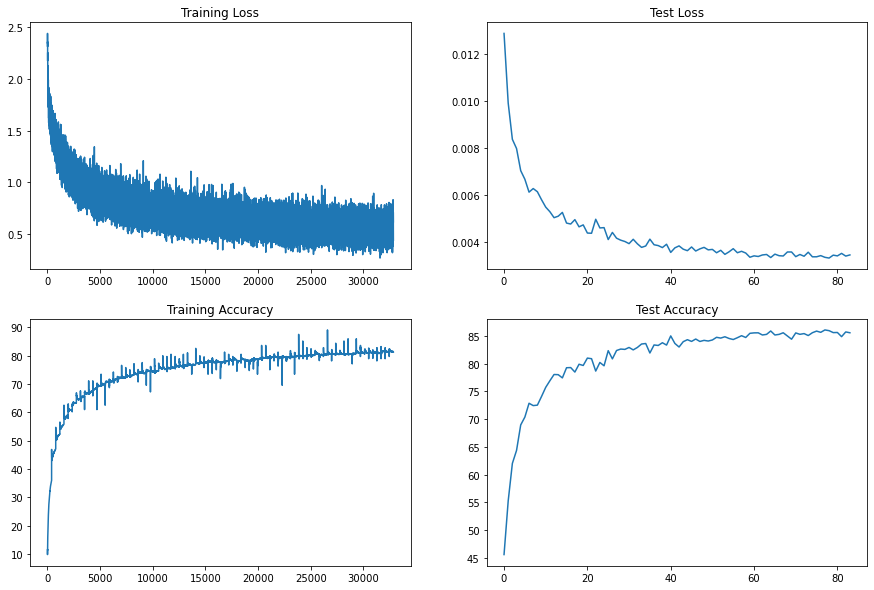

In [10]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot([t.cpu().item() for t in train_losses])
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

#### G. Class-Wise Accuracies

In [11]:
class_accuracies = class_accuracy.rate(testloader,model,classes)

In [12]:
for label,acc in class_accuracies.items():
  print(label,":",round(acc,2))

plane : 86.21
car : 96.43
bird : 66.67
cat : 61.76
deer : 92.59
dog : 72.73
frog : 88.89
horse : 92.0
ship : 93.75
truck : 92.31


In [13]:
print(Style.BRIGHT+Fore.GREEN+"Done!")

Done!
